In [103]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import itertools

In [104]:
comunidades={'Andalucía':8426405,
 'Aragón':1320794,
 'Asturias':1022293,
 'Cantabria':581684,
 'Ceuta':84843,
 'Castilla y Leon':2408083,
 'Castilla La Mancha':2035505,
 'Canarias':2207225,
 'Cataluña':7565099,
 'Extremadura':1065371,
 'Galicia':2700330,
 'Baleares':1187802,
 'Murcia':1487698,
 'Madrid':6640705,
 'Melilla':84714,
 'Navarra':649966,
 'País Vasco':2178048,
 'La Rioja':313582,
 'C. Valenciana':4974475}

In [105]:
pob_spain=0
for i in comunidades.keys():
    pob_spain+=comunidades[i]
comunidades['España']=pob_spain

In [106]:
path_local_csv = '/Users/mharias/Documents/proyectos/covid/vacunacion/csv/'
path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [107]:
#datos_row = pd.read_csv(path_escovid19data_csv)

In [108]:
datos_row = pd.read_csv(path_escovid19data_csv+'estado_vacunacion_.csv')

In [110]:
dia = '16/4/21' # dia del informe
dia = datetime.today().strftime(format='%-d/%-m/%y')
un_dia = timedelta(days=1)

In [111]:
dia

'19/4/21'

In [112]:
datos_row

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,4/1/21,Andalucía,NaN,NaN,NaN,140295,25809,0.183962,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...
1,4/1/21,Aragón,NaN,NaN,NaN,23715,2004,0.084503,NaN,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...
2,4/1/21,Asturias,NaN,NaN,NaN,23720,9380,0.395447,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...
3,4/1/21,Baleares,NaN,NaN,NaN,8940,153,0.017114,NaN,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...
4,4/1/21,Canarias,NaN,NaN,NaN,20835,4846,0.232589,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,19/4/21,País Vasco,454950.0,70900.0,154700.0,680550,628743,0.923875,458169.0,170574.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1495,19/4/21,Ceuta,10170.0,1600.0,6100.0,17870,17862,0.999552,14070.0,3792.0,NaN,16/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1496,19/4/21,Melilla,10170.0,1500.0,6100.0,17770,16215,0.912493,11921.0,4294.0,NaN,17/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1497,19/4/21,Fuerzas Armadas,19500.0,0.0,66100.0,85600,70111,0.819054,64530.0,5581.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [113]:
datos_row = datos_row[datos_row['ccaa']!='Fuerzas Armadas']

<ipython-input-114-031e0322508d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-114-031e0322508d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']


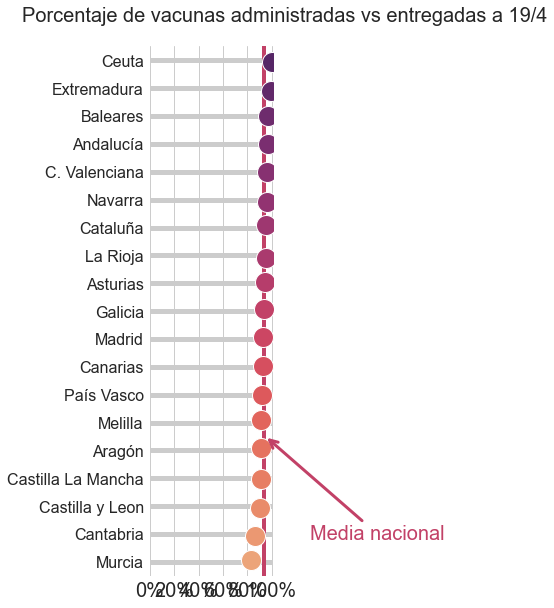

In [114]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(dia[:-3])
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']

colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()

#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=4,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,13.5), va='center', xytext=(media*1.4,17),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)
g.fig.suptitle(title,fontsize=20,y=1.05)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

g.fig.savefig(path_img+'estado_vacunas_comunidad.png',bbox_inches = 'tight',dpi=144)

<ipython-input-115-fb904f333c97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-115-fb904f333c97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']


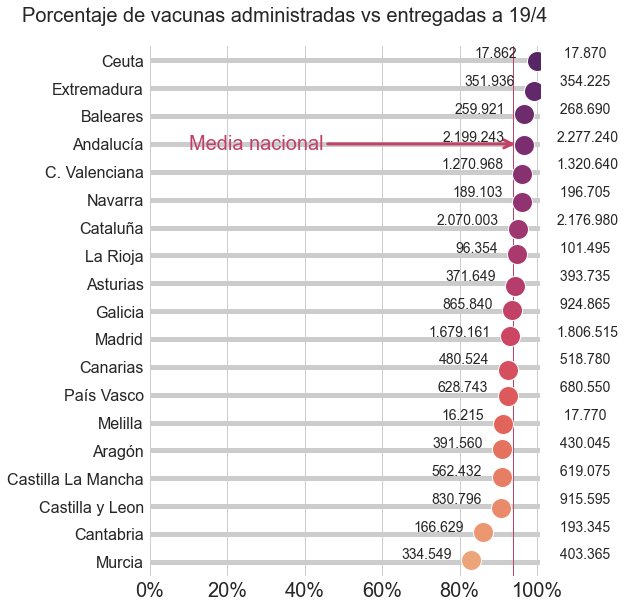

In [115]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(dia[:-3])
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']

colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')



# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,3), va='center', 
            xytext=(0.1,3),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=20,y=1.05)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    ax.text(s='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis administradas'].values[0]).replace(',','.'), 
            x=datos.loc[datos['ccaa']==i.get_text(),'% sobre entregadas']-0.05,
            y=i.get_position()[1]-.1,
            horizontalalignment='right',
           fontsize=14)
    ax.text(s='{:>8,d}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis entregadas'].values[0]).replace(',','.'), 
            x=1+.05,
            y=i.get_position()[1]-.1,
            fontsize=14)


g.fig.savefig(path_img+'estado_vacunas_comunidad_connumeros.png',bbox_inches = 'tight',dpi=144)

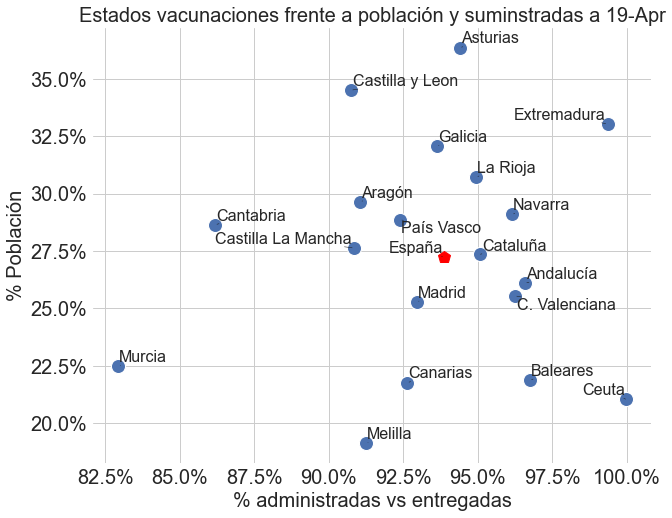

In [116]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%d-%b')

admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
vacunas_poblacion = datos['Dosis administradas'].sum()/datos['poblacion'].sum()


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='vacunas_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'vacunas_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,vacunas_poblacion, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,vacunas_poblacion,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('% Población',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones frente a población y suminstradas a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig(path_img+'estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


Ciclos terminados..

<ipython-input-117-ac4fe56e73b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-117-ac4fe56e73b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


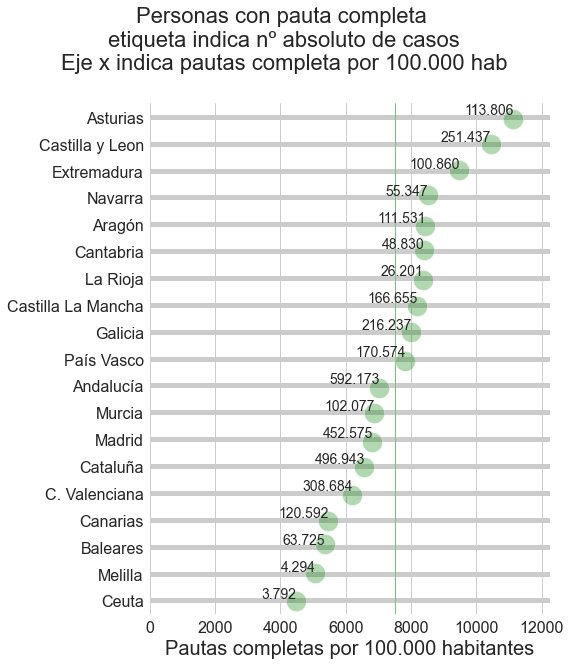

In [117]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Personas con pauta completa \n etiqueta indica nº absoluto de casos \nEje x indica pautas completa por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']

colores = sns.color_palette("Greens_r",19)
media = datos['pauta_poblacion'].mean()
mas_cercano =  abs(datos['pauta_poblacion']-media).idxmin()
indice_color_media = datos.sort_values('pauta_poblacion',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('pauta_poblacion',ascending=False),
                 x_vars='pauta_poblacion', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
#g.map(sns.stripplot, size=20, orient="h", jitter=True,
#      palette=colores,linewidth=1,edgecolor='white',alpha=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      color='green',linewidth=1,edgecolor='white',alpha=.3)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, datos['pauta_poblacion'].max()*1.1), xlabel="", ylabel="")

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}'.format(v)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticks([0,0.01,0.02,0.02,0.8,1.0])

y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('Pautas completas por 100.000 habitantes',fontsize=20)
ax.set_ylabel('')
#ax.annotate('Media nacional', xy=(media+.01,10), va='center', 
#            xytext=(0.1,10),
#            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
#            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=22,y=1.15)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    valor='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Total pauta completada'].values[0])
    if valor!='0':
        ax.text(s=valor.replace(',','.'), 
                x=datos.loc[datos['ccaa']==i.get_text(),'pauta_poblacion']+20,
                y=i.get_position()[1]-.1,
                horizontalalignment='right',
                fontsize=14)


g.fig.savefig(path_img+'estado_pautas_comunidad_{}{}'.format(today,'.png'),bbox_inches = 'tight',dpi=144)

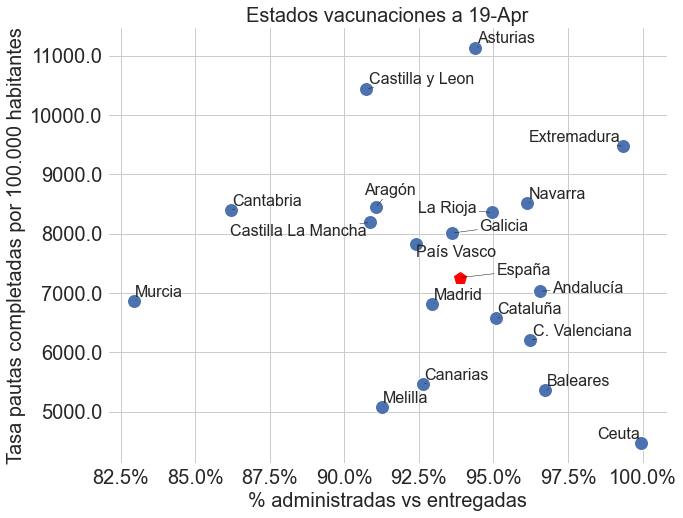

In [118]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%-d-%b')

datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
pauta_espanna = datos['Total pauta completada'].sum()/datos['poblacion'].sum()*100000


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='pauta_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1f}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'pauta_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,pauta_espanna, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,pauta_espanna,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('Tasa pautas completadas por 100.000 habitantes',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig(path_img+'estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


# Vacunas por poblacion

In [119]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
1478,19/4/21,Andalucía,1468440.0,219200.0,589600.0,2277240,2199243,0.965749,1607070.0,592173.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,0.260994,7027.587684
1479,19/4/21,Aragón,291645.0,45800.0,92600.0,430045,391560,0.910509,280029.0,111531.0,NaN,17/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,0.296458,8444.238844
1480,19/4/21,Asturias,280535.0,42200.0,71000.0,393735,371649,0.943906,257843.0,113806.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,0.363545,11132.424853
1481,19/4/21,Baleares,162990.0,24300.0,81400.0,268690,259921,0.967364,196196.0,63725.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,0.218825,5364.951398
1482,19/4/21,Canarias,319380.0,47800.0,151600.0,518780,480524,0.926258,359932.0,120592.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,0.217705,5463.511876
1483,19/4/21,Cantabria,132945.0,19900.0,40500.0,193345,166629,0.861822,117799.0,48830.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,0.286460,8394.592253
1484,19/4/21,Castilla y Leon,647895.0,100800.0,166900.0,915595,830796,0.907384,579359.0,251437.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,0.345003,10441.375982
1485,19/4/21,Castilla La Mancha,412875.0,63800.0,142400.0,619075,562432,0.908504,395777.0,166655.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,0.276311,8187.403126
1486,19/4/21,Cataluña,1413980.0,221100.0,541900.0,2176980,2070003,0.950860,1573060.0,496943.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,0.273625,6568.889581
1487,19/4/21,C. Valenciana,836740.0,131600.0,352300.0,1320640,1270968,0.962388,962284.0,308684.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,0.255498,6205.358354


<ipython-input-120-cc68d0205274>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-120-cc68d0205274>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
<ipython-input-120-cc68d0205274>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

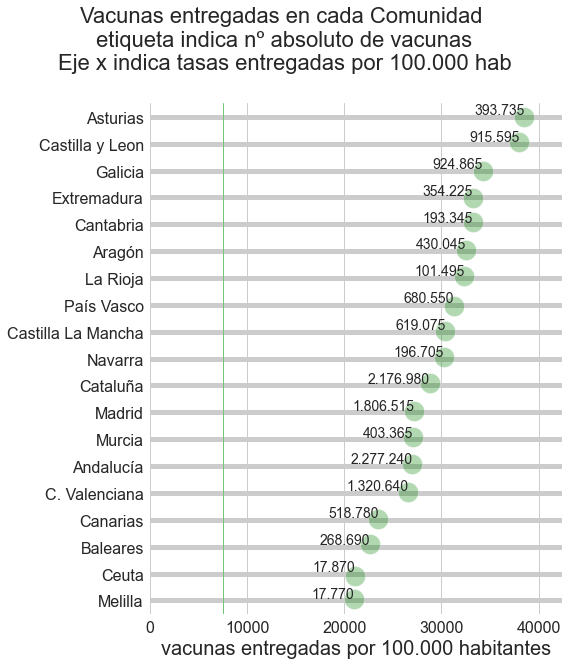

In [120]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']
colores = sns.color_palette("Greens_r",19)

g = sns.PairGrid(datos.sort_values('vacunas_poblacion',ascending=False),
                 x_vars='vacunas_poblacion', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
#g.map(sns.stripplot, size=20, orient="h", jitter=True,
#      palette=colores,linewidth=1,edgecolor='white',alpha=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      color='green',linewidth=1,edgecolor='white',alpha=.3)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, datos['vacunas_poblacion'].max()*1.1), xlabel="", ylabel="")

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}'.format(v)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticks([0,0.01,0.02,0.02,0.8,1.0])

y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('vacunas entregadas por 100.000 habitantes',fontsize=20)
ax.set_ylabel('')
#ax.annotate('Media nacional', xy=(media+.01,10), va='center', 
#            xytext=(0.1,10),
#            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
#            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=22,y=1.15)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    valor='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis entregadas'].values[0])
    if valor!='0':
        ax.text(s=valor.replace(',','.'), 
                x=datos.loc[datos['ccaa']==i.get_text(),'vacunas_poblacion']+20,
                y=i.get_position()[1]-.1,
                horizontalalignment='right',
                fontsize=14)


g.fig.savefig(path_img+'entregadas_poblacion_{}{}'.format(today,'.png'),bbox_inches = 'tight',dpi=144)

In [121]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
1478,19/4/21,Andalucía,1468440.0,219200.0,589600.0,2277240,2199243,0.965749,1607070.0,592173.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,27025.048048,7027.587684
1479,19/4/21,Aragón,291645.0,45800.0,92600.0,430045,391560,0.910509,280029.0,111531.0,NaN,17/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,32559.581585,8444.238844
1480,19/4/21,Asturias,280535.0,42200.0,71000.0,393735,371649,0.943906,257843.0,113806.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,38514.887610,11132.424853
1481,19/4/21,Baleares,162990.0,24300.0,81400.0,268690,259921,0.967364,196196.0,63725.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,22620.773496,5364.951398
1482,19/4/21,Canarias,319380.0,47800.0,151600.0,518780,480524,0.926258,359932.0,120592.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,23503.720735,5463.511876
1483,19/4/21,Cantabria,132945.0,19900.0,40500.0,193345,166629,0.861822,117799.0,48830.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,33238.837582,8394.592253
1484,19/4/21,Castilla y Leon,647895.0,100800.0,166900.0,915595,830796,0.907384,579359.0,251437.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,38021.737623,10441.375982
1485,19/4/21,Castilla La Mancha,412875.0,63800.0,142400.0,619075,562432,0.908504,395777.0,166655.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,30413.828509,8187.403126
1486,19/4/21,Cataluña,1413980.0,221100.0,541900.0,2176980,2070003,0.950860,1573060.0,496943.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,28776.622751,6568.889581
1487,19/4/21,C. Valenciana,836740.0,131600.0,352300.0,1320640,1270968,0.962388,962284.0,308684.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,26548.329221,6205.358354


<ipython-input-122-859b4973be5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-122-859b4973be5a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
<ipython-input-122-859b4973be5a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

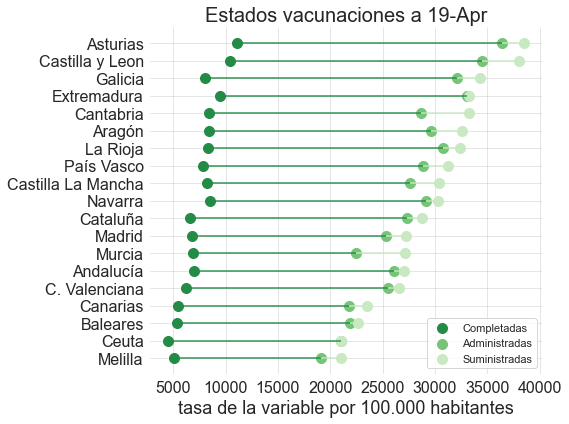

In [122]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
datos['tasa_administradas']=100000*datos['Dosis administradas']/datos['poblacion']
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']
datos=datos.sort_values('vacunas_poblacion')

colores = sns.color_palette("Greens_r",3)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 6))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=colores[2],linewidth=2, alpha=0.7)
ax.scatter(datos['pauta_poblacion'], my_range, color=colores[0], alpha=1 ,s=100, label='Completadas')
ax.scatter(datos['tasa_administradas'], my_range, color=colores[1], alpha=1 ,s=100, label='Administradas')
ax.scatter(datos['vacunas_poblacion'], my_range, color=colores[2], alpha=1, s=100,label='Suministradas')


ax.legend()
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig(path_img+'suministrada_admin_pauta.png',dpi=100)


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


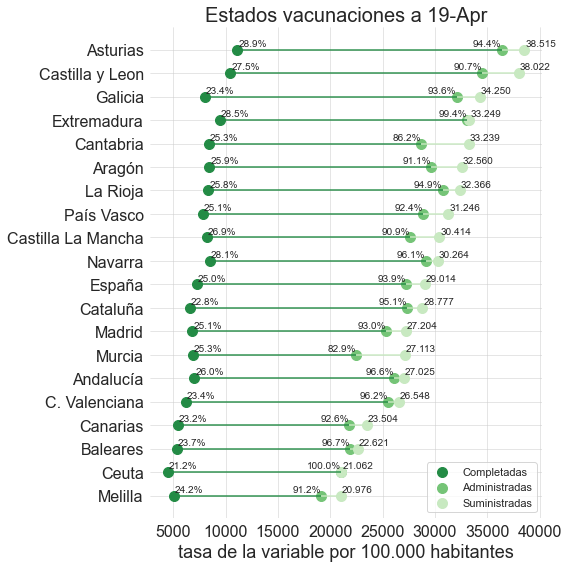

In [123]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100000*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100000*datos['Total pauta completada']/datos['poblacion']

poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100000 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100000 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100000 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa},
                      ignore_index = True)

datos=datos.sort_values('vacunas_poblacion').copy()


colores_bolas = sns.color_palette("Greens_r",3)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 8))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=colores[2],linewidth=2, alpha=0.7)
ax.scatter(datos['pauta_poblacion'], my_range, color=colores_bolas[0], alpha=1 ,s=100, label='Completadas')
ax.scatter(datos['tasa_administradas'], my_range, color=colores_bolas[1], alpha=1 ,s=100, label='Administradas')
ax.scatter(datos['vacunas_poblacion'], my_range, color=colores_bolas[2], alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    
    ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas'],
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    


ax.legend()
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig(path_img+'suministrada_admin_pauta.png',dpi=144)


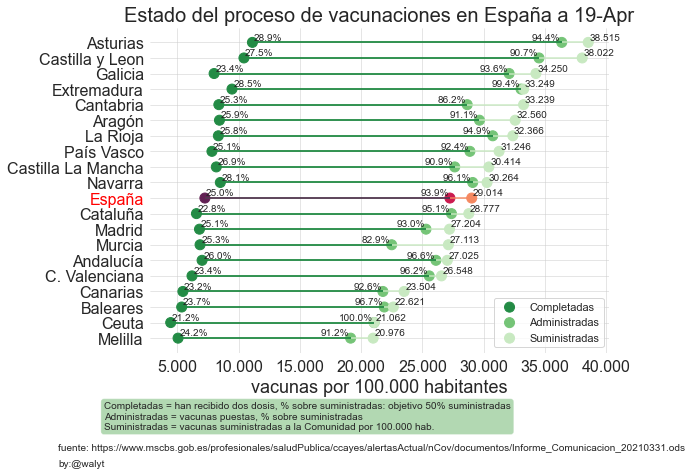

In [124]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= 'Estado del proceso de vacunaciones en España'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100000*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100000*datos['Total pauta completada']/datos['poblacion']
autor='@walyt'
fuente ='fuente: https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210331.ods'
poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100000 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100000 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100000 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa},
                      ignore_index = True)

datos=datos.sort_values('vacunas_poblacion').copy()


colores_bolas = sns.color_palette("Greens_r",3)
colores_rojos = sns.color_palette('rocket',3)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(9, 7))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)


c = [colores_bolas[0]  if datos.loc[i,'ccaa']!='España' else colores_rojos[0] for i in datos.index]
ax.scatter(datos['pauta_poblacion'], my_range, color=c, alpha=1 ,s=100, label='Completadas')
ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=c,linewidth=2, alpha=0.7)
c = [colores_bolas[1]  if datos.loc[i,'ccaa']!='España' else colores_rojos[1] for i in datos.index]
ax.scatter(datos['tasa_administradas'], my_range, color=c, alpha=1 ,s=100, label='Administradas')

c = [colores_bolas[2]  if datos.loc[i,'ccaa']!='España' else colores_rojos[2] for i in datos.index]
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=c,linewidth=2, alpha=0.7)
ax.scatter(datos['vacunas_poblacion'], my_range, color=c, alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas']-100,
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)

datos[datos['ccaa']=='']
ax.get_yticklabels()[datos.index.get_loc(datos[datos['ccaa']=='España'].index.values[0])].set_color("red")


ax.legend(loc=4)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0f}'.format(v).replace(',','.')))

ax.set_title(title+' a {}'.format(today),fontsize=20)

ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)

textstr = '\n'.join((
    'Completadas = han recibido dos dosis, % sobre suministradas: objetivo 50% suministradas',
     'Administradas = vacunas puestas, % sobre suministradas',
    'Suministradas = vacunas suministradas a la Comunidad por 100.000 hab.',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.3)

# place a text box in upper left in axes coords .65, .35
ax.text(-.2,-.3,fuente,transform=ax.transAxes, fontsize=10,ha='left')
ax.text(-.1, -.15, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
ax.text(-.2,-.35,'by:'+autor, transform=ax.transAxes, fontsize=10)
f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'suministrada_admin_pauta.png',dpi=144)


In [125]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,tasa_administradas,pauta_poblacion
18,19/4/21,Melilla,10170.0,1500.0,6100.0,17770,16215,0.912493,11921.0,4294.0,NaN,17/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84714.0,20976.461978,19140.874000,5068.819794
17,19/4/21,Ceuta,10170.0,1600.0,6100.0,17870,17862,0.999552,14070.0,3792.0,NaN,16/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84843.0,21062.432964,21053.003783,4469.431774
3,19/4/21,Baleares,162990.0,24300.0,81400.0,268690,259921,0.967364,196196.0,63725.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802.0,22620.773496,21882.519140,5364.951398
4,19/4/21,Canarias,319380.0,47800.0,151600.0,518780,480524,0.926258,359932.0,120592.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225.0,23503.720735,21770.503687,5463.511876
9,19/4/21,C. Valenciana,836740.0,131600.0,352300.0,1320640,1270968,0.962388,962284.0,308684.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475.0,26548.329221,25549.791687,6205.358354
0,19/4/21,Andalucía,1468440.0,219200.0,589600.0,2277240,2199243,0.965749,1607070.0,592173.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405.0,27025.048048,26099.421996,7027.587684
14,19/4/21,Murcia,260465.0,37700.0,105200.0,403365,334549,0.829395,232472.0,102077.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1487698.0,27113.365750,22487.695755,6861.406011
13,19/4/21,Madrid,1154715.0,179300.0,472500.0,1806515,1679161,0.929503,1226586.0,452575.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,6640705.0,27203.662864,25285.884556,6815.164956
8,19/4/21,Cataluña,1413980.0,221100.0,541900.0,2176980,2070003,0.950860,1573060.0,496943.0,NaN,18/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099.0,28776.622751,27362.536829,6568.889581
19,NaN,España,NaN,NaN,NaN,13617485,12783488,NaN,NaN,3406333.0,NaN,NaN,NaN,NaN,NaN,29013.731058,27236.797603,7257.612515


## Dashboard

In [126]:
datos = datos_row.copy()

In [127]:
datos.loc[:,'ccaa'] = datos.apply(lambda x:'España' if x['ccaa']=='Totales' else x['ccaa'] ,axis=1)

In [128]:
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)

In [129]:
datos.loc[:,'Tasa entregadas'] = 100000*datos['Dosis entregadas']/datos['poblacion']


In [130]:
datos.loc[:,'Tasa administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']


In [131]:
datos.loc[:,'Tasa pautas'] = 100000*datos['Total pauta completada']/datos['poblacion']


In [132]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [133]:
primer_dia = datos['date_pub'][0]
ultimo_dia = list(datos['date_pub'])[-1]

In [134]:
lista_dias =  pd.date_range(primer_dia, end = ultimo_dia).tolist()
lista_dias = datos['date_pub'].unique().astype('datetime64[s]').tolist()

In [135]:
un_dia=timedelta(days=1)

In [136]:
n_dias = (list(datos['date_pub'])[-1]-datos['date_pub'][0]).days

In [137]:
n_dias

105

Vamos a generar una tabla con los siguientes valores para las tres variables suministradas, administradas y pautas completas:
* valores últimas 24 horas
* valores última semana
* media última semana
* valores desde principio
* desde principio

In [138]:
columnas = ['ccaa','poblacion','Dosis entregadas','Tasa entregadas',
         'Dosis administradas','Tasa administradas',
        'Total pauta completada','Tasa pautas']

In [139]:
columns = ['Dia_entregadas','Total_entregadas',
           'Dia_administradas','Total_administradas',
           'Dia_pautas','Total_pautas']

In [140]:
#columns = pd.MultiIndex.from_product([['Entregadas','Administradas','Pautas'],['Hoy','Semana','Total']])

In [141]:
for comunidad in datos['ccaa'].unique():
    ayer = ultimo_dia-un_dia if ultimo_dia.dayofweek!=0 else ultimo_dia-3*un_dia
    entregadas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    
    administradas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    
    pautas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    valores=[entregadas_hoy,entregadas_semana,entregadas_total,
        administradas_hoy,administradas_semana,administradas_total,
        pautas_hoy,pautas_semana,pautas_total]
    tabla.loc[comunidad]=valores

ValueError: cannot set a row with mismatched columns

In [142]:
indices = [i for i in itertools.product(lista_dias,datos['ccaa'].unique())]
tabla_row = pd.DataFrame(columns=columns,index=pd.MultiIndex.from_tuples(indices).set_names(['fecha','ccaa']))

In [143]:
for indice in range(len(lista_dias)-1):
    #print (dia)
    for comunidad in datos['ccaa'].unique():
        #print (comunidad)
        dia = lista_dias[indice+1] 
        ayer = lista_dias[indice]
        entregadas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
        entregadas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    
        administradas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
        administradas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    
        pautas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
        pautas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
        
        
        valores=[entregadas_dia,entregadas_total,
                 administradas_dia,administradas_total,
                 pautas_dia,pautas_total]
        tabla_row.loc[(dia,comunidad),columns]=valores

In [144]:
tabla = tabla_row.copy().reset_index()

In [145]:
tabla

,fecha,ccaa,Dia_entregadas,Total_entregadas,Dia_administradas,Total_administradas,Dia_pautas,Total_pautas
0,2021-01-04,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04,Aragón,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-04,Asturias,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,Baleares,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04,Canarias,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1475,2021-04-19,Navarra,0,196705,12071,189103,1274.0,55347.0
1476,2021-04-19,País Vasco,0,680550,24250,628743,5827.0,170574.0
1477,2021-04-19,Ceuta,0,17870,112,17862,1.0,3792.0
1478,2021-04-19,Melilla,0,17770,694,16215,1.0,4294.0


def colores(x):
    df = tabla.copy()
    df.loc[:,('Dia_entregadas',slice(None))] = 'color : midnightblue'
    df.loc[:,('Administradas',slice(None))] = 'color : darkviolet'
    df.loc[:,('Pautas',slice(None))] = 'color : darkgreen'
    return df

In [146]:
def colores(x):
    df = tabla.copy()
    df.loc[:,'Dia_entregadas'] = 'color : midnightblue'
    df.loc[:,'Dia_administradas'] = 'color : darkviolet'
    df.loc[:,'Dia_pautas'] = 'color : darkgreen'
    return df

In [147]:

from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    dict(selector="th", props=[("font-size", "100%"),
                               ("text-align", "center"),
                               ("color",'black')]),
    dict(selector="caption", props=[("font-size", "200%"),
                                    ("color",'black'),
                                    ("caption-side", "bottom"),
                                    ("text-align", "center")]) ]

estilo_columnas = {
    'Dia_entregadas': [dict(selector='td', props=[('color', 'green')])],
    'Dia_administradas': [dict(selector='td', props=[('color', 'red')])],
    }
html = (tabla.style.set_table_styles(styles)
          .set_properties(**{'color': 'navy',
                           'border-color': 'white'}).format(lambda x: '{:,.0f}'.format(x).replace(',','.')).\
                            set_caption('Valores Vacunación a {} tras {} días de campaña'.format(ultimo_dia.strftime('%-d %b'),n_dias)).
        set_table_styles(estilo_columnas,overwrite=False)).apply(colores,axis=None)
html

AttributeError: 'Timestamp' object has no attribute 'rstrip'

# Gráficos con las nuevas series: vacunaciones completas

In [148]:
path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_pauta_completa_.csv?raw=True'
path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_pauta_completa_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [149]:
datos_raw= pd.read_csv(path_github_csv)

In [150]:
datos = datos_raw.copy()

In [151]:
datos.tail()

,date_pub,ccaa,Personas pauta completa >=80 años,Población INE>=80 años,%,Personas pauta completa 70-79 años,Población INE70-79 años,%.1,Personas pauta completa 60-69 años,Población INE60-69 años,...,Población INE18-24 años,%.5,16-17 años,Población INE16-17 años,%.6,Total Personas pauta completa,Total Población INE Población a Vacunar (1),% pauta completa sobre Población a Vacunar INE,source_name,source
289,19/4/21,País Vasco,90590,157950,0.5735359290914847,3994,213081,0.01874404569154453,13434,280119,...,140323,0.023274872971643993,6,41824,0.0001434583014537108,170574,1898123,0.08986456620566739,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
290,19/4/21,Ceuta,1676,2605,0.6433781190019194,389,4318,0.09008800370541918,328,7857,...,7581,0.005803983643318823,0,2175,0.0,3792,66158,0.05731733123734091,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
291,19/4/21,Melilla,1421,2349,0.6049382716049383,1096,3748,0.29242262540021347,346,7827,...,8536,0.006794751640112465,6,2324,0.0025817555938037868,4294,66178,0.06488561153253347,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
292,19/4/21,Fuerzas Armadas,1,-,-,4,-,-,533,-,...,-,-,0,-,-,5581,-,-,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
293,19/4/21,Total España,1724844,2834024,0.6086201104860086,130453,3960045,0.03294230242333105,277869,5336986,...,3310299,0.022090149560507977,956,949049,0.001007324173988909,3411914,40129822,0.08502190714925174,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [152]:
datos.columns

Index(['date_pub', 'ccaa', 'Personas pauta completa >=80 años',
       'Población INE>=80 años', '%', 'Personas pauta completa 70-79 años',
       'Población INE70-79 años', '%.1', 'Personas pauta completa 60-69 años',
       'Población INE60-69 años', '%.2', 'Personas pauta completa 50-59 años',
       'Población INE50-59 años', '%.3', 'Personas pauta completa 25-49 años',
       'Población INE25-49 años', '%.4', '18-24 años',
       'Población INE18-24 años', '%.5', '16-17 años',
       'Población INE16-17 años', '%.6', 'Total Personas pauta completa',
       'Total Población INE Población a Vacunar (1)',
       '% pauta completa sobre Población a Vacunar INE', 'source_name',
       'source'],
      dtype='object')

In [153]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [154]:
datos['date_pub']

0     2021-03-31
1     2021-03-31
2     2021-03-31
3     2021-03-31
4     2021-03-31
         ...    
289   2021-04-19
290   2021-04-19
291   2021-04-19
292   2021-04-19
293   2021-04-19
Name: date_pub, Length: 294, dtype: datetime64[ns]

In [155]:
hoy = datetime.today()
#hoy = datetime (year=2021,month=4,day=16)
hoy_str = hoy.strftime('%Y-%m-%d')
hoy_titulo = hoy.strftime('%d/%m')

In [156]:
datos = datos[datos['date_pub'] == hoy_str]

In [157]:
datos

,date_pub,ccaa,Personas pauta completa >=80 años,Población INE>=80 años,%,Personas pauta completa 70-79 años,Población INE70-79 años,%.1,Personas pauta completa 60-69 años,Población INE60-69 años,...,Población INE18-24 años,%.5,16-17 años,Población INE16-17 años,%.6,Total Personas pauta completa,Total Población INE Población a Vacunar (1),% pauta completa sobre Población a Vacunar INE,source_name,source
273,2021-04-19,Andalucía,309542,413516,0.7485611197632014,17710,650381,0.027230192763933757,43680,916147,...,625846,0.020097595894197615,121,181921,0.0006651238724501295,592173,7062213,0.08385091188838399,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
274,2021-04-19,Aragón,60842,98807,0.615766089447104,3407,118955,0.02864108276238914,9658,156367,...,89180,0.016461089930477686,26,25106,0.0010356090177646778,111531,1132764,0.09845916713454876,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
275,2021-04-19,Asturias,60656,87826,0.6906383075626807,4020,109249,0.03679667548444379,10630,149652,...,54179,0.045017442182395395,28,15563,0.0017991389834864744,113806,901209,0.12628147299904904,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
276,2021-04-19,Baleares,29079,49542,0.5869565217391305,2292,80516,0.02846639177306374,5138,117231,...,85839,0.015307727256841297,31,23300,0.0013304721030042918,63725,986279,0.0646115348699506,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
277,2021-04-19,Canarias,41689,90236,0.4619996453743517,14438,154531,0.09343109149620464,9665,235092,...,163899,0.014856710535146644,23,44352,0.0005185786435786436,120592,1871033,0.06445209678290015,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
278,2021-04-19,Cantabria,26373,41042,0.6425856439744652,1731,53066,0.032619756529604645,3776,77345,...,34935,0.01780449406039788,5,10791,0.0004633490872022982,48830,501384,0.09739042330828267,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
279,2021-04-19,Castilla y Leon,144888,223657,0.6478133928291983,10277,245410,0.041876859133694634,20443,318575,...,144422,0.01872290925205301,88,40684,0.002163012486481172,251437,2092873,0.12013963580207686,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
280,2021-04-19,Castilla - La Mancha,84811,135194,0.6273281358640176,6016,159101,0.03781245875261626,14022,218444,...,149518,0.024204443612140344,86,42364,0.0020300254933434047,166655,1719964,0.09689446988425339,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
281,2021-04-19,Cataluña,198515,447196,0.4439105000939185,31084,635292,0.0489286816141239,51700,837584,...,556316,0.030270565649738637,229,159864,0.0014324675974578393,496943,6531658,0.07608221373501184,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
282,2021-04-19,C. Valenciana,164490,276531,0.594833852262495,10949,437862,0.025005595370230803,24202,580728,...,352834,0.015341492033080712,104,103049,0.001009228619394657,308684,4269305,0.07230310319829573,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [158]:
datos = datos [['ccaa', '%','%.1', '%.2', '%.3', '%.4', '%.5','%.6','% pauta completa sobre Población a Vacunar INE']]

In [159]:
datos.columns = ['ccaa','>80','70-79','60-69','50-59','25-49','18-24','16-17','Pob Objetivo']

In [160]:
datos.set_index('ccaa',inplace=True)

In [161]:
datos = datos[datos.index!='Fuerzas Armadas']

In [162]:
for columna in datos.columns:
    datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])

In [163]:
datos

,>80,70-79,60-69,50-59,25-49,18-24,16-17,Pob Objetivo
ccaa,,,,,,,,
Andalucía,0.748561,0.027230,0.047678,0.057590,0.045089,0.020098,0.000665,0.083851
Aragón,0.615766,0.028641,0.061765,0.071782,0.049090,0.016461,0.001036,0.098459
Asturias,0.690638,0.036797,0.071031,0.087030,0.067924,0.045017,0.001799,0.126281
Baleares,0.586957,0.028466,0.043828,0.047076,0.038931,0.015308,0.001330,0.064612
Canarias,0.462000,0.093431,0.041112,0.049633,0.041980,0.014857,0.000519,0.064452
Cantabria,0.642586,0.032620,0.048820,0.062569,0.055055,0.017804,0.000463,0.097390
Castilla y Leon,0.647813,0.041877,0.064170,0.079709,0.057722,0.018723,0.002163,0.120140
Castilla - La Mancha,0.627328,0.037812,0.064190,0.074035,0.049921,0.024204,0.002030,0.096894
Cataluña,0.443911,0.048929,0.061725,0.063336,0.046164,0.030271,0.001432,0.076082


In [164]:
np.arange(0,1,.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [165]:
rango_valores = np.arange(0,1,.05)
#magma_r
colores = sns.color_palette("Blues",len(rango_valores)+1)

cmap, norm = colors.from_levels_and_colors(
    rango_valores, 
    colores,extend = 'both')

color_texto = 'black'
titulo = 'Pautas completas sobre poblacion objetivo por rango edades y comunidades a {}'.format(hoy_titulo)
fuente = 'Fuente: {}'.format(path_github_csv)
autor='@walyt'

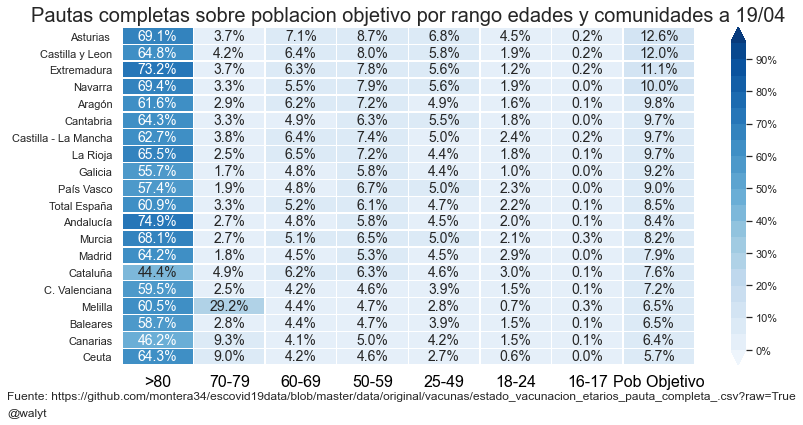

In [166]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
datos = datos.sort_values('Pob Objetivo',ascending=False)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(datos, annot=True, fmt='0.1%',linewidths=.5, cmap=cmap,cbar=True,norm=norm,annot_kws={"fontsize":14,'weight':'normal'},ax=ax)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_texto,rotation=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_texto,rotation=0)
ax.set_title(titulo,fontsize=20)
f.subplots_adjust(top=.9,bottom=.2)
ax.text(-.2,-.1,fuente,transform=ax.transAxes, fontsize=12,ha='left')
ax.text(-.2,-.15,autor, transform=ax.transAxes, fontsize=12)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
cbar.set_ticklabels(["0%","10%","20%","30%","40%",'50%','60%','70%','80%','90%','100%'])

# here set the labelsize by 20

#cbar.ax.set_yticklabels([12])
f.tight_layout()
f.savefig(path_img+'heatmap_vacunas_completas_comunidades_edades.png',dpi=144)

# Gráficos con las nuevas series: vacunaciones simples

In [167]:
path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [168]:
datos_raw= pd.read_csv(path_github_csv)
datos = datos_raw.copy()

In [169]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [170]:
hoy = datetime.today()
#hoy = datetime (year=2021,month=4,day=16)
hoy_str = hoy.strftime('%Y-%m-%d')
hoy_titulo = hoy.strftime('%d/%m')

In [171]:
datos = datos[datos['date_pub'] == hoy_str]

In [172]:
datos.columns

Index(['date_pub', 'ccaa', 'Personas con al menos 1 dosis >=80 años',
       'Población INE>=80 años', '%',
       'Personas con al menos 1 dosis 70-79 años', 'Población INE70-79 años',
       '%.1', 'Personas con al menos 1 dosis 60-69 años',
       'Población INE60-69 años', '%.2',
       'Personas con al menos 1 dosis 50-59 años', 'Población INE50-59 años',
       '%.3', 'Personas con al menos 1 dosis 25-49 años',
       'Población INE25-49 años', '%.4', '18-24 años',
       'Población INE18-24 años', '%.5', '16-17 años',
       'Población INE16-17 años', '%.6', 'Total Personas con al menos 1 dosis',
       'Total Población INE Población a Vacunar (1)',
       '% Con al menos 1 dosis sobre Población a Vacunar INE', 'source_name',
       'source'],
      dtype='object')

In [173]:
datos = datos [['ccaa', '%','%.1', '%.2', '%.3', '%.4', '%.5','%.6','% Con al menos 1 dosis sobre Población a Vacunar INE']]

In [174]:
datos.columns = ['ccaa','>80','70-79','60-69','50-59','25-49','18-24','16-17','Pob Objetivo']

In [175]:
datos

,ccaa,>80,70-79,60-69,50-59,25-49,18-24,16-17,Pob Objetivo
273,Andalucía,1.013184495884077,0.5392147064566769,0.3599760737086952,0.11668660045959711,0.10995782853683199,0.04605765635635604,0.0015116451646593851,0.22755898186588255
274,Aragón,0.994119849808212,0.4502627043840108,0.28836647118637565,0.1356107451605419,0.11308881979362585,0.06489123121776183,0.0011949334820361666,0.2472085977308601
275,Asturias,0.979413841003803,0.5168010691173375,0.3793467511292866,0.1363644747763534,0.10252875704372934,0.0619428191734805,0.0023131786930540386,0.2861078839647629
276,Baleares,0.9696822897743329,0.4078319837051021,0.40903003471777943,0.12547271663540355,0.09225650463092658,0.04333694474539545,0.0014163090128755365,0.19892545618430485
277,Canarias,0.9200762445143845,0.44156188725886714,0.4525760127949909,0.08287590724425982,0.08082545761648993,0.03602218439404755,0.0009695165945165945,0.19237073851717207
278,Cantabria,0.952292773256664,0.4899182150529529,0.22403516710841037,0.12486105553332444,0.11625763870655526,0.044911979390296265,0.0004633490872022982,0.2349476648636574
279,Castilla y Leon,0.9984485171490273,0.394095595126523,0.3343765204425959,0.14738112415557159,0.12007578320590026,0.05404301283737935,0.0023842296725985644,0.2768247284952312
280,Castilla - La Mancha,0.9843706081630842,0.3591743609405346,0.35972606251487793,0.14808213920995975,0.10628439038517232,0.04086464505945772,0.0022188650741195356,0.23010772318490386
281,Cataluña,0.9765449601517008,0.4186641733250222,0.4845102103192038,0.12265566322885563,0.10507143249491908,0.06424586026646725,0.0020392333483460943,0.24083624709070806
282,C. Valenciana,1.0334573700597762,0.45662560350064635,0.2894969762091719,0.12026573303878331,0.11340245882284324,0.049827964425197116,0.001135382196818989,0.22539593680938702


In [176]:
datos.set_index('ccaa',inplace=True)
datos = datos[datos.index!='Fuerzas Armadas']

In [177]:
for columna in datos.columns:
    datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [178]:
datos

,>80,70-79,60-69,50-59,25-49,18-24,16-17,Pob Objetivo
ccaa,,,,,,,,
Andalucía,1.013184,0.539215,0.359976,0.116687,0.109958,0.046058,0.001512,0.227559
Aragón,0.994120,0.450263,0.288366,0.135611,0.113089,0.064891,0.001195,0.247209
Asturias,0.979414,0.516801,0.379347,0.136364,0.102529,0.061943,0.002313,0.286108
Baleares,0.969682,0.407832,0.409030,0.125473,0.092257,0.043337,0.001416,0.198925
Canarias,0.920076,0.441562,0.452576,0.082876,0.080825,0.036022,0.000970,0.192371
Cantabria,0.952293,0.489918,0.224035,0.124861,0.116258,0.044912,0.000463,0.234948
Castilla y Leon,0.998449,0.394096,0.334377,0.147381,0.120076,0.054043,0.002384,0.276825
Castilla - La Mancha,0.984371,0.359174,0.359726,0.148082,0.106284,0.040865,0.002219,0.230108
Cataluña,0.976545,0.418664,0.484510,0.122656,0.105071,0.064246,0.002039,0.240836


In [179]:
rango_valores = np.arange(0,1,.05)
#ocean_r summer_r
colores = sns.color_palette("ocean_r",len(rango_valores)+1)

cmap, norm = colors.from_levels_and_colors(
    rango_valores, 
    colores,extend = 'both')

color_texto = 'black'
titulo = 'Población con, al menos, una vacuna, por rango edades y comunidades, a fecha {}'.format(hoy_titulo)
fuente = 'Fuente: {}'.format(path_github_csv)
autor='@walyt'

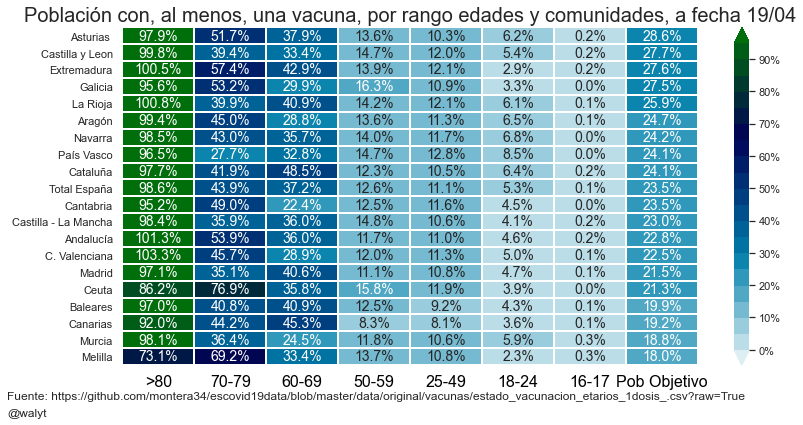

In [180]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
datos = datos.sort_values('Pob Objetivo',ascending=False)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(datos, annot=True, fmt='0.1%',linewidths=1, cmap=cmap,cbar=True,norm=norm,annot_kws={"fontsize":14,'weight':'normal'},ax=ax)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_texto,rotation=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_texto,rotation=0)
ax.set_title(titulo,fontsize=20)
f.subplots_adjust(top=.9,bottom=.2)
ax.text(-.2,-.1,fuente,transform=ax.transAxes, fontsize=12,ha='left')
ax.text(-.2,-.15,autor, transform=ax.transAxes, fontsize=12)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
cbar.set_ticklabels(["0%","10%","20%","30%","40%",'50%','60%','70%','80%','90%','100%'])

# here set the labelsize by 20

#cbar.ax.set_yticklabels([12])
f.tight_layout()
f.savefig(path_img+'heatmap_vacunas_1_comunidades_edades.png',dpi=144)

# Dumbbell con las vacunaciones por Comunidad y por Rangos edad: empezamos por al menos una vacuna

In [191]:
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [192]:
def datos_vacunacion_1_porcentajes():
    path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
    datos_raw= pd.read_csv(path_github_csv)
    datos = datos_raw.copy()
    datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')
    hoy = datetime.today()
    #hoy=datetime(year=2021,month=4,day=1)
    hoy_str = hoy.strftime('%Y-%m-%d')
    datos = datos[datos['date_pub'] == hoy_str]
    datos = datos [['ccaa', '%','%.1', '%.2', '%.3', '%.4', '%.5','%.6','% Con al menos 1 dosis sobre Población a Vacunar INE']]
    datos.columns = ['ccaa','>80','70-79','60-69','50-59','25-49','18-24','16-17','Pob Objetivo']
    datos.set_index('ccaa',inplace=True)
    datos = datos[datos.index!='Fuerzas Armadas']
    for columna in datos.columns:
        datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])
    return datos.reset_index()

In [193]:
datos_

,ccaa,>80,70-79,60-69,50-59,25-49,18-24,16-17,Pob Objetivo
18,Melilla,0.730524,0.692102,0.333589,0.137180,0.107991,0.022727,0.002582,0.180135
14,Murcia,0.980680,0.363522,0.244512,0.118412,0.105806,0.059309,0.003025,0.187859
4,Canarias,0.920076,0.441562,0.452576,0.082876,0.080825,0.036022,0.000970,0.192371
3,Baleares,0.969682,0.407832,0.409030,0.125473,0.092257,0.043337,0.001416,0.198925
17,Ceuta,0.861804,0.769338,0.357643,0.157840,0.118805,0.039177,0.000000,0.212673
13,Madrid,0.971265,0.351085,0.406368,0.111007,0.108033,0.047315,0.001244,0.215356
9,C. Valenciana,1.033457,0.456626,0.289497,0.120266,0.113402,0.049828,0.001135,0.225396
0,Andalucía,1.013184,0.539215,0.359976,0.116687,0.109958,0.046058,0.001512,0.227559
7,Castilla - La Mancha,0.984371,0.359174,0.359726,0.148082,0.106284,0.040865,0.002219,0.230108
5,Cantabria,0.952293,0.489918,0.224035,0.124861,0.116258,0.044912,0.000463,0.234948


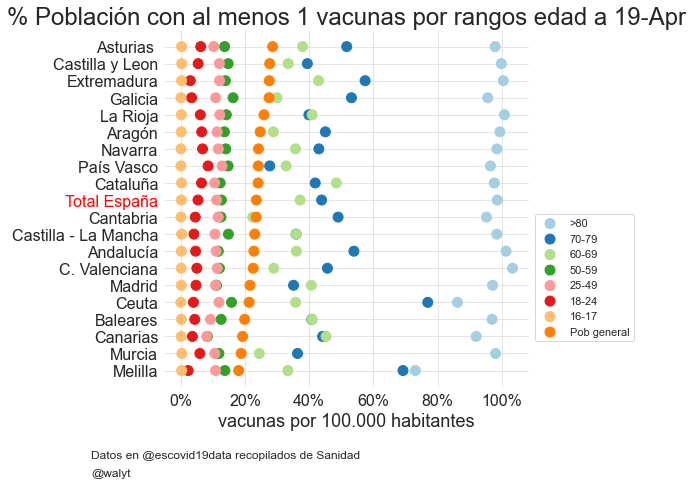

In [213]:
datos_ = datos_vacunacion_1_porcentajes().sort_values('Pob Objetivo')

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= '% Población con al menos 1 vacunas por rangos edad'

fuente ='Datos en @escovid19data recopilados de Sanidad'
autor='@walyt'

#datos_=datos.sort_values('Pob Objetivo').copy()

colores_bolas = sns.color_palette("Paired",8)
colores_rojos = sns.color_palette('rocket',8)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(9, 7))


c = [colores_bolas[0] for i in datos_.index]
ax.scatter(datos_['>80'], my_range, color=c, alpha=1 ,s=100, label='>80')

c = [colores_bolas[1] for i in datos_.index]
ax.scatter(datos_['70-79'], my_range, color=c, alpha=1 ,s=100, label='70-79')

c = [colores_bolas[2] for i in datos_.index]
ax.scatter(datos_['60-69'], my_range, color=c, alpha=1, s=100,label='60-69')

c = [colores_bolas[3]  for i in datos_.index]
ax.scatter(datos_['50-59'], my_range, color=c, alpha=1 ,s=100, label='50-59')

c = [colores_bolas[4]  for i in datos_.index]
ax.scatter(datos_['25-49'], my_range, color=c, alpha=1 ,s=100, label='25-49')

c = [colores_bolas[5] for i in datos_.index]
ax.scatter(datos_['18-24'], my_range, color=c, alpha=1 ,s=100, label='18-24')

c = [colores_bolas[6]  for i in datos_.index]
ax.scatter(datos_['16-17'], my_range, color=c, alpha=1 ,s=100, label='16-17')



c = [colores_bolas[7] for i in datos_.index]
ax.scatter(datos_['Pob Objetivo'], my_range, color=c, alpha=1 ,s=100, label='Pob general')




#datos[datos['ccaa']=='']


ax.legend(loc=4)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0%}'.format(v).replace(',','.')))

ax.set_xticks([0,.2,.4,.6,.8,1])
ax.set_title(title+' a {}'.format(today),fontsize=24)

ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos_['ccaa'])
ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)

ax.legend(bbox_to_anchor=(1, .5))

# these are matplotlib.patch.Patch properties

# place a text box in upper left in axes coords .65, .35
ax.text(-.2,-.2,fuente,transform=ax.transAxes, fontsize=12,ha='left')

ax.text(-.2,-.25,autor, transform=ax.transAxes, fontsize=12)
f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'dumbbell_rangoedades_1.png',dpi=144)


## Y con los rangos resumidos: agregamos <60 años

In [195]:
def datos_vacunacion_1_resumido():
    path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
    datos_raw= pd.read_csv(path_github_csv)
    datos = datos_raw.copy()
    datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')
    hoy = datetime.today()
    #hoy=datetime(year=2021,month=4,day=1)
    hoy_str = hoy.strftime('%Y-%m-%d')
    datos = datos[datos['date_pub'] == hoy_str]
    
    datos = datos [['ccaa', 
                    'Personas con al menos 1 dosis >=80 años','Población INE>=80 años', '%',
                    'Personas con al menos 1 dosis 70-79 años','Población INE70-79 años','%.1', 
                    'Personas con al menos 1 dosis 60-69 años','Población INE60-69 años', '%.2',
                    'Personas con al menos 1 dosis 50-59 años', 'Población INE50-59 años','%.3', 
                    'Personas con al menos 1 dosis 25-49 años','Población INE25-49 años', '%.4', 
                    '18-24 años','Población INE18-24 años', '%.5', 
                    '16-17 años','Población INE16-17 años', '%.6', 
                    'Total Personas con al menos 1 dosis','Total Población INE Población a Vacunar (1)', '% Con al menos 1 dosis sobre Población a Vacunar INE']]
    datos.columns = ['ccaa',
                     'Pob 1 dosis >80','Pob > 80', '%>80',
                     'Pob 1 dosis 70-79','Pob 70-79', '%70-79',
                     'Pob 1 dosis 60-69','Pob 60-69', '%60-69',
                     'Pob 1 dosis 50-59','Pob 50-59', '%50-59',
                     'Pob 1 dosis 25-49','Pob 25-49', '%25-49',
                     'Pob 1 dosis 18-24','Pob 18-24', '%18-24',
                     'Pob 1 dosis 16-17','Pob 16-17', '%16-17',
                     'Pob 1 dosis Obj','Pob Obj', '%Pob Obj',
                     ]
    datos = datos[datos['ccaa']!='Fuerzas Armadas']
    for columna in datos.columns[1:]:
        datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])
    
    datos.loc[:,'Pob 1 dosis <60'] = datos.apply(lambda x:x['Pob 1 dosis 50-59']+x['Pob 1 dosis 25-49']\
                                                 +x['Pob 1 dosis 18-24']+x['Pob 1 dosis 16-17'],axis=1)
    datos.loc[:,'Pob <60'] = datos.apply(lambda x:x['Pob 50-59']+x['Pob 25-49']+x['Pob 18-24']+x['Pob 16-17'],axis=1)
    datos.loc[:,'%<60'] = datos.loc[:,'Pob 1 dosis <60'] / datos.loc[:,'Pob <60']
    #datos.set_index('ccaa',inplace=True)
    return datos

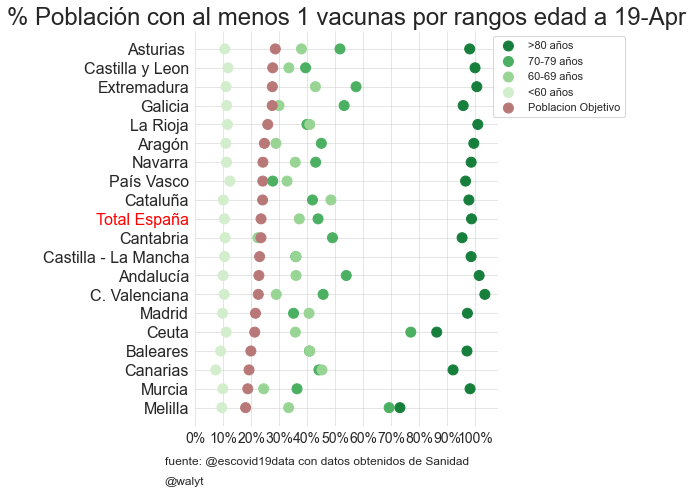

In [199]:
sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= '% Población con al menos 1 vacunas por rangos edad'

autor='@walyt'
fuente ='fuente: @escovid19data con datos obtenidos de Sanidad'

datos_ = datos_vacunacion_1_resumido().sort_values('%Pob Obj')
#colores_bolas = sns.color_palette("Paired",5)
colores_bolas = sns.color_palette("Greens_r",4)
#colores_bolas = sns.color_palette("Blues_r",5)
colores_rojos = sns.color_palette('pink',5)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos_.index)+1)
f, ax = plt.subplots(figsize=(9, 7))

valor_alpha =  1.0
size_marker = 100
c = [colores_bolas[0] for i in datos_.index]
#c = [colores_bolas[0]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[0] for i in datos_.index]
ax.scatter(datos_['%>80'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='>80 años')

c = [colores_bolas[1] for i in datos_.index]
#c = [colores_bolas[1]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[1] for i in datos_.index]
ax.scatter(datos_['%70-79'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='70-79 años')

c = [colores_bolas[2] for i in datos_.index]
#c = [colores_bolas[2]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[2] for i in datos_.index]
ax.scatter(datos_['%60-69'], my_range, color=c, alpha=valor_alpha, s=size_marker,label='60-69 años')

c = [colores_bolas[3]  for i in datos_.index]
#c = [colores_bolas[3]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[3] for i in datos_.index]
ax.scatter(datos_['%<60'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='<60 años')

c = [colores_rojos[1] for i in datos_.index]
#c = [colores_rojos[0]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[0] for i in datos_.index]
ax.scatter(datos_['%Pob Obj'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='Poblacion Objetivo')


#datos[datos['ccaa']=='']

#ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")


ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=14,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0%}'.format(v).replace(',','.')))

ax.set_xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
ax.set_title(title+' a {}'.format(today),fontsize=24)

#ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos_['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")

#ax.legend(loc=4,bbox_to_anchor=(1.0, .5))
ax.legend(loc='upper center',bbox_to_anchor=(1.2,1))

# place a text box in upper left in axes coords .65, .35
ax.text(-.1,-.1,fuente,transform=ax.transAxes, fontsize=12,ha='left')

ax.text(-.1,-.15,autor, transform=ax.transAxes, fontsize=12)

ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")


f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'dumbbell_rangoedades_resumido_1.png',dpi=144)

# Y por vacunaciones completas

In [200]:
def datos_vacunacion_completa_resumido():
    path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_pauta_completa_.csv?raw=True'
    datos_raw= pd.read_csv(path_github_csv)
    datos = datos_raw.copy()
    datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')
    hoy = datetime.today()
    #hoy=datetime(year=2021,month=4,day=1)
    hoy_str = hoy.strftime('%Y-%m-%d')
    datos = datos[datos['date_pub'] == hoy_str]
    datos = datos[
                ['ccaa', 
                   'Personas pauta completa >=80 años','Población INE>=80 años', '%',
                   'Personas pauta completa 70-79 años','Población INE70-79 años', '%.1',
                   'Personas pauta completa 60-69 años','Población INE60-69 años', '%.2', 
                   'Personas pauta completa 50-59 años','Población INE50-59 años', '%.3', 
                   'Personas pauta completa 25-49 años','Población INE25-49 años', '%.4', 
                   '18-24 años', 'Población INE18-24 años', '%.5', 
                   '16-17 años','Población INE16-17 años', '%.6', 
                   'Total Personas pauta completa','Total Población INE Población a Vacunar (1)','% pauta completa sobre Población a Vacunar INE']
                 ]
    
    datos.columns = ['ccaa',
                     'Pob dosis tot >80','Pob > 80', '%>80',
                     'Pob dosis tot 70-79','Pob 70-79', '%70-79',
                     'Pob dosis tot 60-69','Pob 60-69', '%60-69',
                     'Pob dosis tot 50-59','Pob 50-59', '%50-59',
                     'Pob dosis tot 25-49','Pob 25-49', '%25-49',
                     'Pob dosis tot 18-24','Pob 18-24', '%18-24',
                     'Pob dosis tot 16-17','Pob 16-17', '%16-17',
                     'Pob dosis tot Obj','Pob Obj', '%Pob Obj',
                     ]
    datos = datos[datos['ccaa']!='Fuerzas Armadas']
    for columna in datos.columns[1:]:
        datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])
    
    datos.loc[:,'Pob dosis tot <60'] = datos.apply(lambda x:x['Pob dosis tot 50-59']+x['Pob dosis tot 25-49']\
                                                 +x['Pob dosis tot 18-24']+x['Pob dosis tot 16-17'],axis=1)

    datos.loc[:,'Pob <60'] = datos.apply(lambda x:x['Pob 50-59']+x['Pob 25-49']+x['Pob 18-24']+x['Pob 16-17'],axis=1)
    datos.loc[:,'%<60'] = datos.loc[:,'Pob dosis tot <60'] / datos.loc[:,'Pob <60']
    
    
    return datos

In [201]:
datos_= datos_vacunacion_completa_resumido()

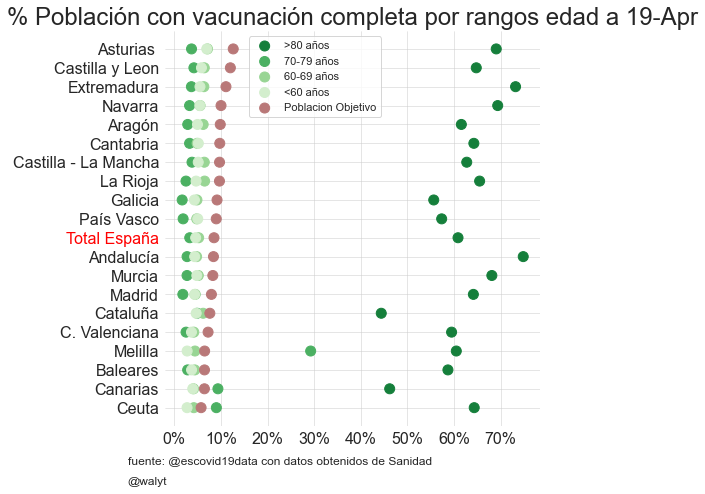

In [202]:
sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= '% Población con vacunación completa por rangos edad'

autor='@walyt'
fuente ='fuente: @escovid19data con datos obtenidos de Sanidad'

datos_ = datos_vacunacion_completa_resumido().sort_values('%Pob Obj')
#colores_bolas = sns.color_palette("Paired",5)
colores_bolas = sns.color_palette("Greens_r",4)
#colores_bolas = sns.color_palette("Blues_r",5)
colores_rojos = sns.color_palette('pink',5)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos_.index)+1)
f, ax = plt.subplots(figsize=(9, 7))

valor_alpha =  1.0
size_marker = 100
c = [colores_bolas[0] for i in datos_.index]
#c = [colores_bolas[0]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[0] for i in datos_.index]
ax.scatter(datos_['%>80'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='>80 años')

c = [colores_bolas[1] for i in datos_.index]
#c = [colores_bolas[1]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[1] for i in datos_.index]
ax.scatter(datos_['%70-79'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='70-79 años')

c = [colores_bolas[2] for i in datos_.index]
#c = [colores_bolas[2]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[2] for i in datos_.index]
ax.scatter(datos_['%60-69'], my_range, color=c, alpha=valor_alpha, s=size_marker,label='60-69 años')

c = [colores_bolas[3]  for i in datos_.index]
#c = [colores_bolas[3]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[3] for i in datos_.index]
ax.scatter(datos_['%<60'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='<60 años')

c = [colores_rojos[1] for i in datos_.index]
#c = [colores_rojos[0]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[0] for i in datos_.index]
ax.scatter(datos_['%Pob Obj'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='Poblacion Objetivo')


#datos[datos['ccaa']=='']

#ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")


ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0%}'.format(v).replace(',','.')))

ax.set_xticks([0,.1,.2,.3,.4,.5,.6,.7])
ax.set_title(title+' a {}'.format(today),fontsize=24)

#ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos_['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")

#ax.legend(loc=4,bbox_to_anchor=(1.0, .5))
ax.legend(loc='upper center',bbox_to_anchor=(0.4, 1.))

# place a text box in upper left in axes coords .65, .35
ax.text(-.1,-.1,fuente,transform=ax.transAxes, fontsize=12,ha='left')

ax.text(-.1,-.15,autor, transform=ax.transAxes, fontsize=12)

ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")


f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'dumbbell_rangoedades_resumido_total.png',dpi=144)